In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
import warnings
warnings.filterwarnings("ignore") 

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
import matplotlib.pyplot as plt
%matplotlib inline

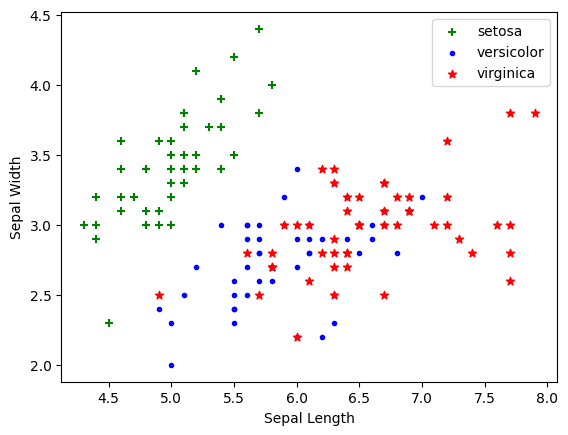

In [9]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+' , label = iris.target_names[0])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.',  label = iris.target_names[1])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*',  label = iris.target_names[2])
plt.legend()
plt.show()

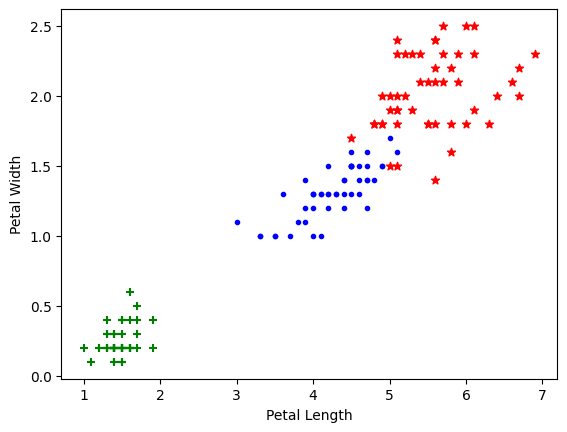

In [10]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='*')

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

120

In [12]:
len(X_test)

30

In [13]:
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

SVC()

In [14]:
model.score(X_test, y_test)

1.0

In [15]:
model.score(X_train, y_train)

0.9583333333333334

In [16]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [17]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

1.0
0.9833333333333333


In [18]:
model_C = SVC(C=0.01) #hypermeter 
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)
print(model_C.score(X_train, y_train))

0.36666666666666664


In [19]:
model_g = SVC(gamma=5)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

1.0

In [20]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
model_linear_kernal.score(X_test, y_test)

1.0